In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import dtreeviz
import graphviz
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [54]:
#pip install graphviz
#pip install pydotplus
#!pip install dtreeviz

In [68]:
#install pydot 3.0.4 with anaconda, that will make it work, or see other graphviz things in anaconda

In [2]:
import kagglehub

path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", path)

c:\Users\Bobby\anaconda3\envs\Python_3_10_16\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Path to dataset files: C:\Users\Bobby\.cache\kagglehub\datasets\iabhishekofficial\mobile-price-classification\versions\1


In [3]:
df = pd.read_csv("C:/Users/Bobby/.cache/kagglehub/datasets/iabhishekofficial/mobile-price-classification/versions/1/train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df = df.sample(700)

In [6]:
X = df.drop(columns="price_range")

In [7]:
y = df[["price_range"]]

In [8]:
y

,price_range
1636,2
1992,0
1355,1
1815,3
400,2
...,...
1239,3
722,1
1317,3
798,3


In [9]:
y.value_counts()

price_range
1              184
2              176
3              173
0              167
Name: count, dtype: int64

In [10]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
X.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [12]:
X.duplicated().sum()

np.int64(0)

#### Training

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [48]:
dtree = DecisionTreeClassifier(criterion="entropy")

In [49]:
dtree = dtree.fit(X_train, y_train)

##### Evaluating

In [50]:
y_pred = dtree.predict(X_test)

In [51]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall:", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1:", metrics.f1_score(y_test, y_pred, average="macro"))

Accuracy: 0.7571428571428571
Precision: 0.7623440748440748
Recall: 0.7413958787550777
F1: 0.7479015507184521


In [52]:
print("Confusion Matrix:", metrics.confusion_matrix(y_test.values, y_pred))

Confusion Matrix: [[13  9  0  0]
 [ 4 37  6  0]
 [ 0  6 25  6]
 [ 0  0  3 31]]


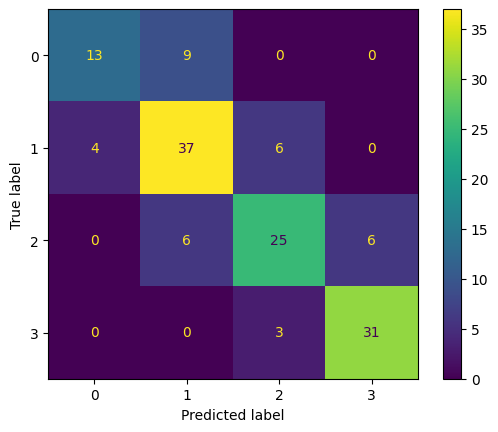

In [53]:
cm = metrics.confusion_matrix(y_test.values, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree.classes_)
disp.plot()

##### Plot tree's

[Text(0.58349609375, 0.9545454545454546, 'x[13] <= 0.284\nentropy = 2.0\nsamples = 560\nvalue = [145, 137, 139, 139]'),
 Text(0.2880859375, 0.8636363636363636, 'x[13] <= -0.687\nentropy = 1.478\nsamples = 330\nvalue = [145, 131, 54, 0]'),
 Text(0.435791015625, 0.9090909090909092, 'True  '),
 Text(0.109375, 0.7727272727272727, 'x[13] <= -1.073\nentropy = 0.809\nsamples = 181\nvalue = [136, 45, 0, 0]'),
 Text(0.03125, 0.6818181818181818, 'x[12] <= 0.823\nentropy = 0.27\nsamples = 108\nvalue = [103, 5, 0, 0]'),
 Text(0.015625, 0.5909090909090909, 'entropy = 0.0\nsamples = 86\nvalue = [86, 0, 0, 0]'),
 Text(0.046875, 0.5909090909090909, 'x[11] <= 0.594\nentropy = 0.773\nsamples = 22\nvalue = [17, 5, 0, 0]'),
 Text(0.03125, 0.5, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0]'),
 Text(0.0625, 0.5, 'x[19] <= -0.037\nentropy = 1.0\nsamples = 10\nvalue = [5, 5, 0, 0]'),
 Text(0.046875, 0.4090909090909091, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0]'),
 Text(0.078125, 0.40909090909090

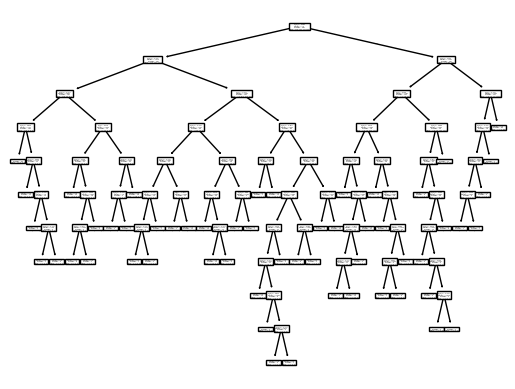

In [55]:
from sklearn import tree
from sklearn.tree import export_graphviz

export_graphviz(dtree, out_file='mobile_price_kaggle.dot', 
                class_names=True, 
                feature_names=X.columns,
                impurity=False,
                filled=True)
  
tree.plot_tree(dtree)

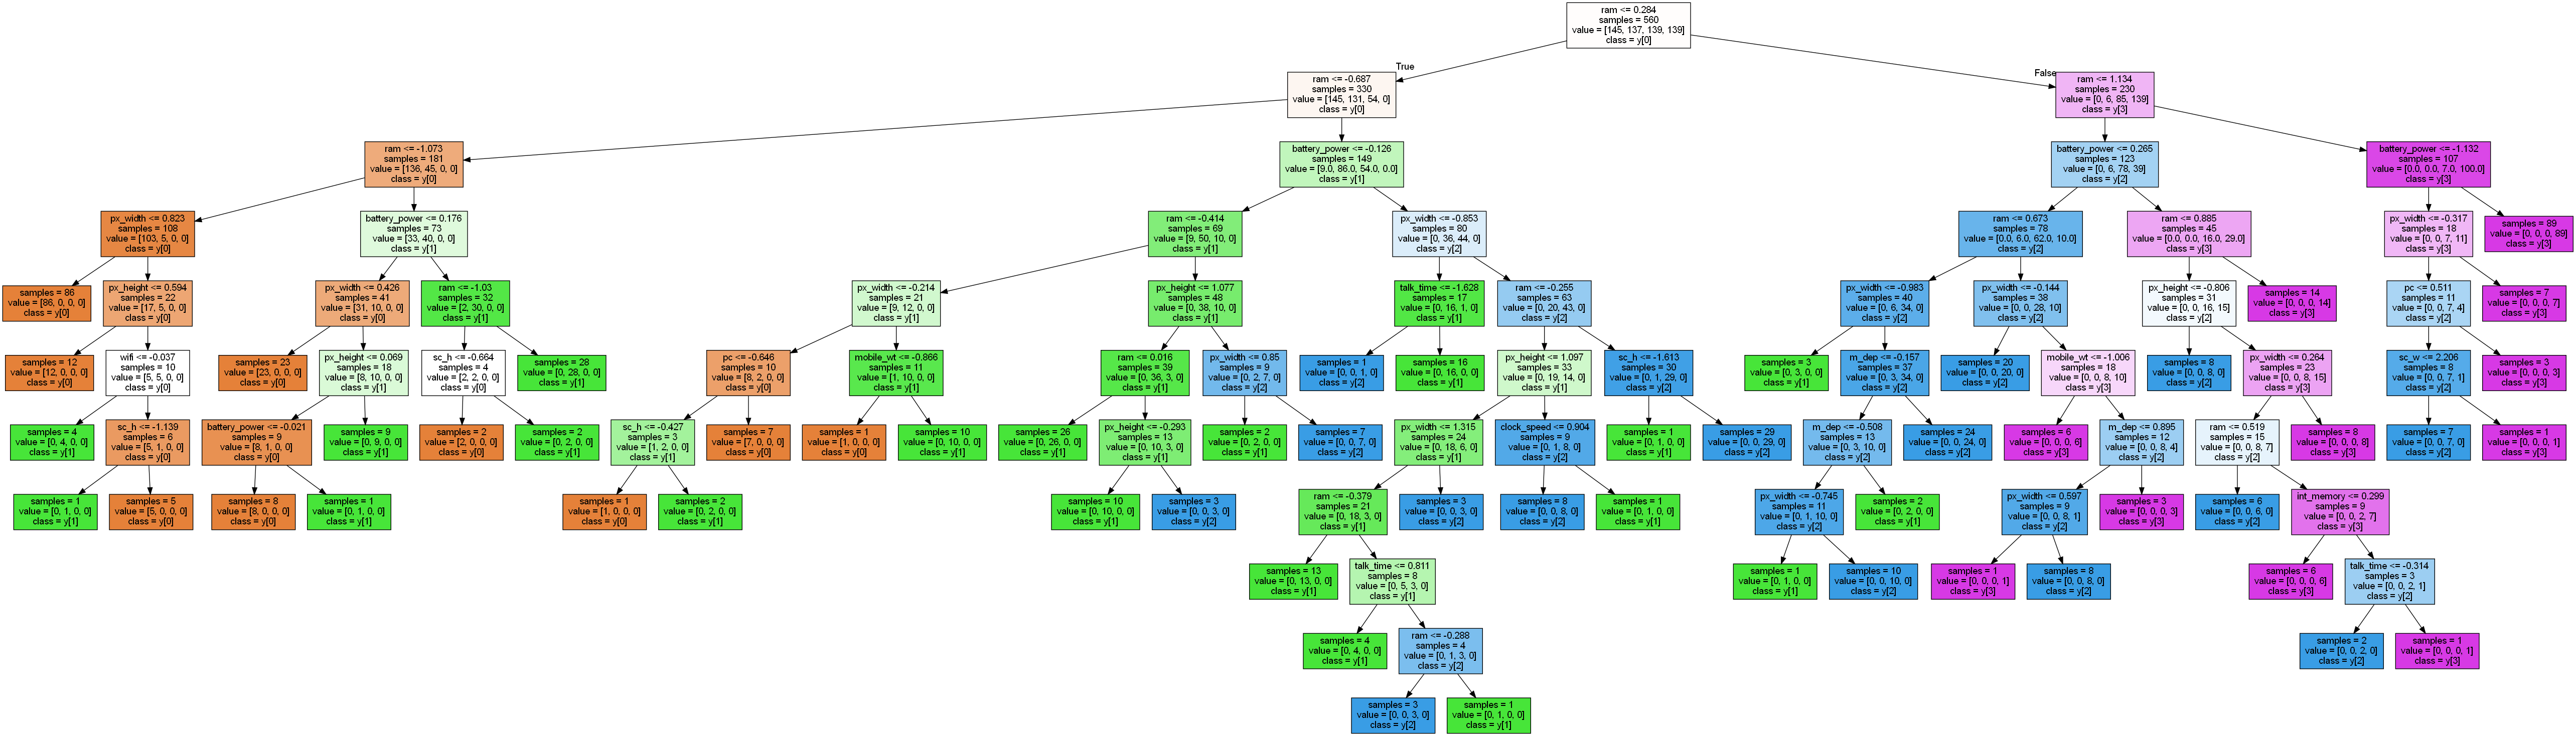

In [56]:
import subprocess
from IPython.display import Image

# Run the Graphviz dot command to create a PNG image from the .dot file
subprocess.run(['dot', '-Tpng', 'mobile_price_kaggle.dot', '-o', 'mobile_price_kaggle.png'])

# Display the generated PNG image
Image(filename='mobile_price_kaggle.png')


In [66]:
df_y_train = y_train["price_range"].to_numpy()
df_x_train = X_train

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x

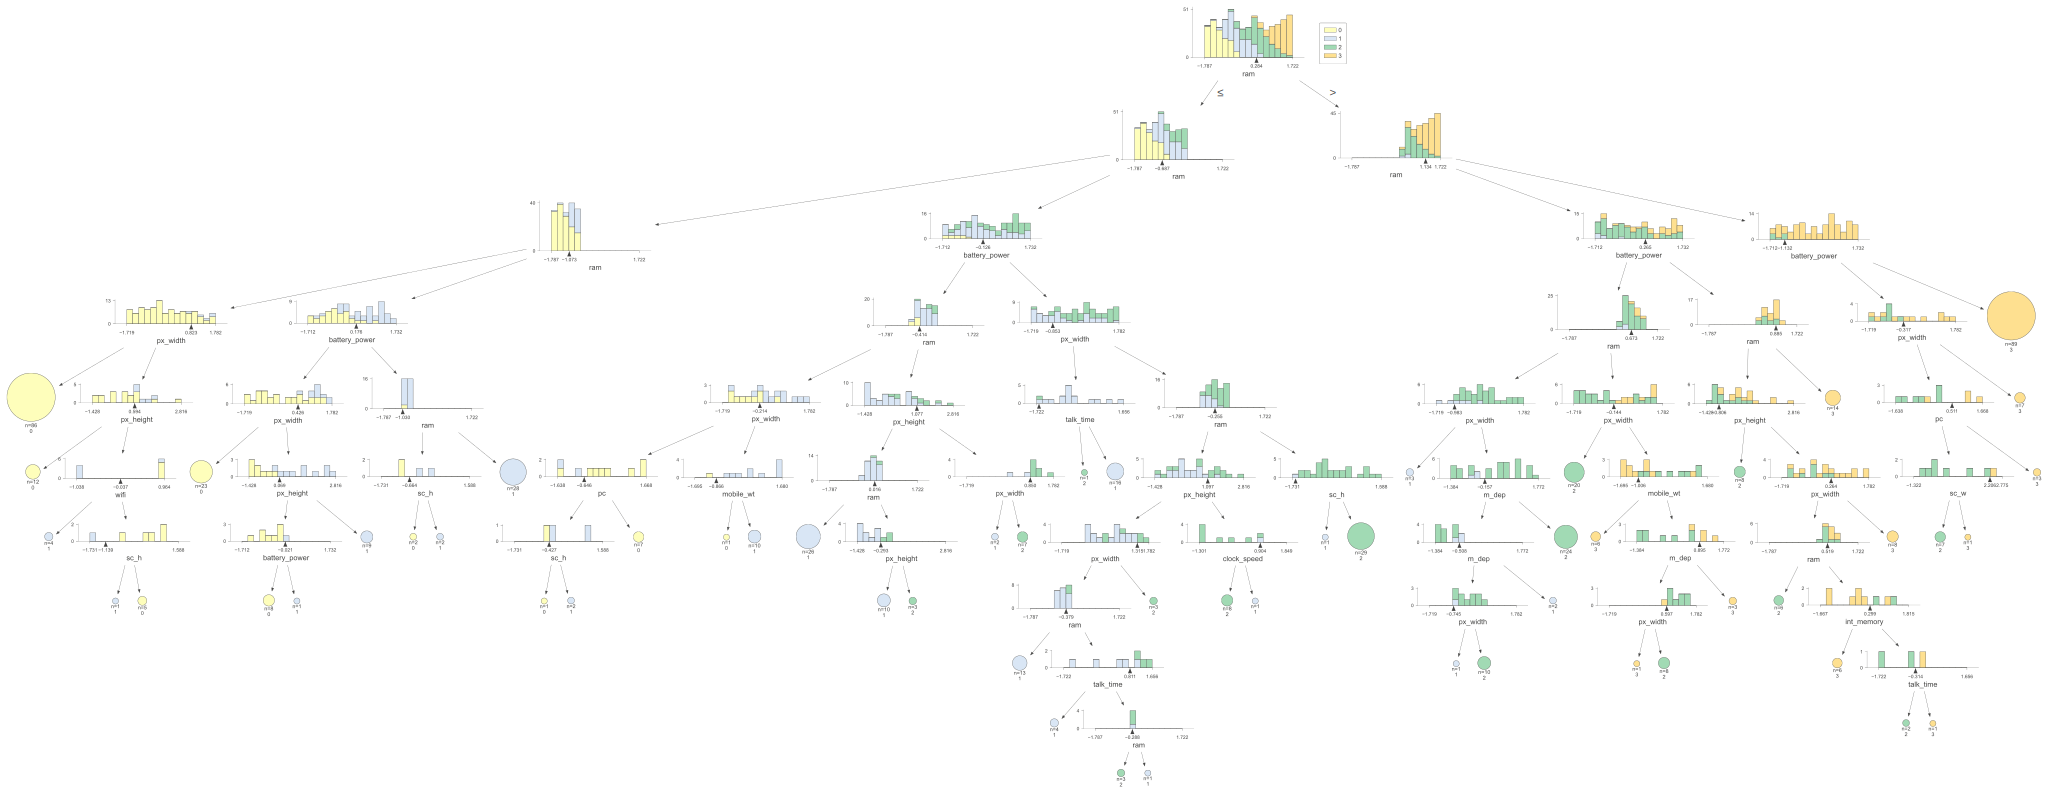

In [67]:
fn = np.array(X.columns)
cn = [0, 1, 2, 3]

viz = dtreeviz.model(dtree, df_x_train, df_y_train, feature_names=fn, class_names=cn)
viz.view()

In [36]:
import graphviz

with open('mobile_price_kaggle.dot') as f:
    tree_graph = f.read()

graph = graphviz.Source(tree_graph)
# This render the .dot file into a PDF
graph.render("mobile_price_kaggle", view=True)

'mobile_price_kaggle.pdf'